# 检测元数据集

In [2]:
import numpy as np
import pandas as pd

In [11]:
train_df=pd.read_csv('D:/house price/input/train.csv',index_col=0,engine='python')
test_df=pd.read_csv('D:/house price/input/test.csv',index_col=0,engine='python')


In [12]:
train_df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


## 合并数据，why?对数据进行统一化处理。。

In [17]:
data=pd.concat([train_df,test_df],ignore_index=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x05070B10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x04F44050>]], dtype=object)

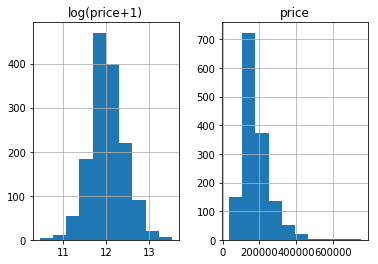

In [22]:
%matplotlib inline
prices =pd.DataFrame({"price":train_df["SalePrice"],"log(price+1)":np.log1p(train_df["SalePrice"])})
prices.hist()

log的目的是为了使label本身更加平滑

In [23]:
y_train=np.log1p(train_df.pop('SalePrice'))

In [24]:
y_train

Id
1       12.247699
2       12.109016
3       12.317171
4       11.849405
5       12.429220
6       11.870607
7       12.634606
8       12.206078
9       11.774528
10      11.678448
11      11.771444
12      12.751303
13      11.877576
14      12.540761
15      11.964007
16      11.790565
17      11.911708
18      11.407576
19      11.976666
20      11.842236
21      12.692506
22      11.845110
23      12.345839
24      11.774528
25      11.944714
26      12.454108
27      11.811555
28      12.631344
29      12.242891
30      11.134604
          ...    
1431    12.165985
1432    11.875838
1433    11.074436
1434    12.136192
1435    11.982935
1436    12.066816
1437    11.699413
1438    12.885673
1439    11.916395
1440    12.190964
1441    12.160034
1442    11.913720
1443    12.644331
1444    11.703554
1445    12.098493
1446    11.767575
1447    11.969724
1448    12.388398
1449    11.626263
1450    11.429555
1451    11.820418
1452    12.567555
1453    11.884496
1454    11.344519
1455   

In [30]:
all_df =pd.concat((train_df,test_df))

In [31]:
all_df.shape

(2919, 79)

变量转化（feature process）

MSSubClass无大小关系

In [32]:
all_df['MSSubClass']=all_df['MSSubClass'].astype('str')

In [33]:
all_df.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object


In [34]:
all_df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

## get_dummies一键onehot编码

In [39]:
pd.get_dummies(all_df['MSSubClass'],prefix='MSSubClass').head()

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [40]:
all_dummy_df =pd.get_dummies(all_df)
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [43]:
all_dummy_df['MSSubClass_180']

Id
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
       ..
2890    0
2891    0
2892    0
2893    0
2894    0
2895    0
2896    0
2897    0
2898    0
2899    0
2900    0
2901    0
2902    0
2903    0
2904    0
2905    0
2906    0
2907    0
2908    0
2909    0
2910    1
2911    0
2912    0
2913    0
2914    0
2915    0
2916    0
2917    0
2918    0
2919    0
Name: MSSubClass_180, Length: 2919, dtype: uint8

In [59]:
all_dummy_df.dtypes

LotFrontage              float64
LotArea                    int64
OverallQual                int64
OverallCond                int64
YearBuilt                  int64
YearRemodAdd               int64
MasVnrArea               float64
BsmtFinSF1               float64
BsmtFinSF2               float64
BsmtUnfSF                float64
TotalBsmtSF              float64
1stFlrSF                   int64
2ndFlrSF                   int64
LowQualFinSF               int64
GrLivArea                  int64
BsmtFullBath             float64
BsmtHalfBath             float64
FullBath                   int64
HalfBath                   int64
BedroomAbvGr               int64
KitchenAbvGr               int64
TotRmsAbvGrd               int64
Fireplaces                 int64
GarageYrBlt              float64
GarageCars               float64
GarageArea               float64
WoodDeckSF                 int64
OpenPorchSF                int64
EnclosedPorch              int64
3SsnPorch                  int64
          

## 处理好numerical变量
缺失值

In [83]:
all_dummy_df.apply(lambda x: sum(pd.isnull(x))).sort_values(ascending=False)#ascending,提升

SaleCondition_Partial    0
Neighborhood_NridgHt     0
Neighborhood_SWISU       0
Neighborhood_Sawyer      0
Neighborhood_SawyerW     0
Neighborhood_Somerst     0
Neighborhood_StoneBr     0
Neighborhood_Timber      0
Neighborhood_Veenker     0
Condition1_Artery        0
Condition1_Feedr         0
Condition1_Norm          0
Condition1_PosA          0
Condition1_PosN          0
Condition1_RRAe          0
Condition1_RRAn          0
Condition1_RRNe          0
Neighborhood_OldTown     0
Neighborhood_NoRidge     0
Condition2_Artery        0
Neighborhood_NWAmes      0
LandSlope_Sev            0
Neighborhood_Blmngtn     0
Neighborhood_Blueste     0
Neighborhood_BrDale      0
Neighborhood_BrkSide     0
Neighborhood_ClearCr     0
Neighborhood_CollgCr     0
Neighborhood_Crawfor     0
Neighborhood_Edwards     0
                        ..
BsmtFinType2_ALQ         0
BsmtFinType2_BLQ         0
BsmtFinType2_GLQ         0
BsmtFinType2_LwQ         0
BsmtFinType2_Rec         0
BsmtFinType2_Unf         0
H

## 平均值填补

In [82]:
all_dummy_df[numeric_cols]=all_dummy_df[numeric_cols].fillna(all_dummy_df[numeric_cols].mean())

## 标准化numerical数据

In [55]:
numeric_cols =all_df.columns[all_df.dtypes !='object']
numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [63]:
numeric_col_means=all_dummy_df[numeric_cols].mean()
numeric_col_std=all_dummy_df.loc[:,numeric_cols].std()
all_dummy_df.loc[:,numeric_cols] =(all_dummy_df.loc[:,numeric_cols]-numeric_col_means)/numeric_col_std

# 建立模型

In [85]:
dummy_train_df =all_dummy_df.loc[train_df.index]
dummy_test_df =all_dummy_df.loc[test_df.index]

In [86]:
dummy_train_df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.184443,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.523038,0.580708,-0.293030,-0.934542,...,0,0,0,1,0,0,0,0,1,0
2,0.458096,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.569893,1.177709,-0.293030,-0.629681,...,0,0,0,1,0,0,0,0,1,0
3,-0.055935,0.137173,0.646073,-0.507197,0.980053,0.848819,0.333448,0.097840,-0.293030,-0.288418,...,0,0,0,1,0,0,0,0,1,0
4,-0.398622,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.569893,-0.494771,-0.293030,-0.047258,...,0,0,0,1,1,0,0,0,0,0
5,0.629439,0.518814,1.355319,-0.507197,0.947040,0.753100,1.381770,0.468770,-0.293030,-0.161013,...,0,0,0,1,0,0,0,0,1,0
6,0.672275,0.500430,-0.772420,-0.507197,0.715952,0.513801,-0.569893,0.637774,-0.293030,-1.130200,...,0,0,0,1,0,0,0,0,1,0
7,0.243916,-0.010665,1.355319,-0.507197,1.079091,0.992399,0.467277,2.035897,-0.293030,-0.554603,...,0,0,0,1,0,0,0,0,1,0
8,0.000000,0.027119,0.646073,0.391170,0.055700,-0.539116,0.768390,0.916521,-0.103911,-0.784386,...,0,0,0,1,0,0,0,0,1,0
9,-0.784145,-0.513264,0.646073,-0.507197,-1.330831,-1.639892,-0.569893,-0.968860,-0.293030,0.890077,...,0,0,0,1,1,0,0,0,0,0


In [87]:
dummy_test_df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,0.458096,0.184340,-0.772420,0.391170,-0.340452,-1.113434,-0.569893,0.058332,0.558006,-0.661532,...,0,0,0,1,0,0,0,0,1,0
1462,0.500932,0.519702,-0.063174,0.391170,-0.439490,-1.257014,0.032335,1.056991,-0.293030,-0.352120,...,0,0,0,1,0,0,0,0,1,0
1463,0.201080,0.464294,-0.772420,-0.507197,0.848003,0.657380,-0.569893,0.767271,-0.293030,-0.964118,...,0,0,0,1,0,0,0,0,1,0
1464,0.372424,-0.024105,-0.063174,0.391170,0.881015,0.657380,-0.458369,0.352443,-0.293030,-0.538677,...,0,0,0,1,0,0,0,0,1,0
1465,-1.126832,-0.654636,1.355319,-0.507197,0.682939,0.370221,-0.569893,-0.391613,-0.293030,1.037958,...,0,0,0,1,0,0,0,0,1,0
1466,0.243916,-0.021315,-0.063174,-0.507197,0.715952,0.465941,-0.569893,-0.968860,-0.293030,0.460086,...,0,0,0,1,0,0,0,0,1,0
1467,0.000000,-0.277433,-0.063174,1.289537,0.682939,1.088119,-0.569893,1.083330,-0.293030,-0.745710,...,0,0,0,1,0,0,0,0,1,0
1468,-0.270114,-0.223927,-0.063174,-0.507197,0.881015,0.657380,-0.569893,-0.968860,-0.293030,0.519238,...,0,0,0,1,0,0,0,0,1,0
1469,0.672275,0.001000,0.646073,-0.507197,0.616914,0.274501,-0.569893,0.429263,-0.293030,0.232577,...,0,0,0,1,0,0,0,0,1,0


In [88]:
dummy_train_df.shape,dummy_test_df.shape

((1460, 303), (1459, 303))

## Ridge Regression

In [89]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

## 将DF转换为Numpy Array 格式

In [90]:
X_train =dummy_train_df.values
X_test =dummy_test_df.values

## 交叉验证：cross validation

In [115]:
alphas=np.logspace(-3,2,50)
test_scores=[]
for alpha in alphas:
    clf =Ridge(alpha)
    test_score =np.sqrt(-cross_val_score(clf,X_train,y_train,cv=10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

0.13522081435790326

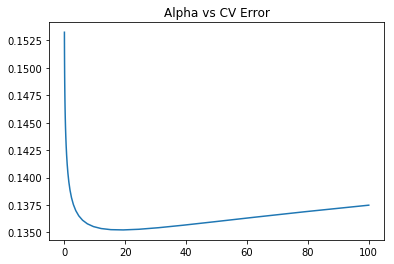

In [117]:
import matplotlib.pyplot as plt
plt.plot(alphas,test_scores)
plt.title("Alpha vs CV Error")
min(test_scores)

In [100]:
test_scores

[0.15324561793330921,
 0.15321658953971315,
 0.15318247414000097,
 0.15314054371451055,
 0.15308812028742277,
 0.15302264226035187,
 0.15294165596128798,
 0.15284274566861064,
 0.1527234161052487,
 0.15258094436723998,
 0.15241222723958583,
 0.15221366162545397,
 0.15198110282139407,
 0.15170994169369972,
 0.15139532720015439,
 0.15103253849320658,
 0.1506174822073314,
 0.15014725307966809,
 0.14962065114466466,
 0.14903851194334963,
 0.14840370905097625,
 0.14772076311538163,
 0.14699514197683411,
 0.14623250986644828,
 0.14543827675563448,
 0.1446177147316631,
 0.14377664256582007,
 0.14292236152012039,
 0.14206435076962382,
 0.14121432113112883,
 0.14038552969215151,
 0.13959158583405801,
 0.13884514595618944,
 0.13815684973932466,
 0.13753468918286399,
 0.13698385375551264,
 0.13650701647142713,
 0.13610498353192807,
 0.13577757574501811,
 0.13552454476021475,
 0.13534629878573362,
 0.13524426209869195,
 0.13522081435790326,
 0.13527889909260907,
 0.13542149437539258,
 0.1356511648

## Random Forest

In [104]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
max_features=[.1,.3,.5,.7,.9,.99]
test_scores=[]
for max_feat in max_features:
    clf=RandomForestRegressor(max_features=max_feat,n_estimators =200)
    test_score =np.sqrt(-cross_val_score(clf,X_train,y_train,cv=5,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

0.1373110869549346

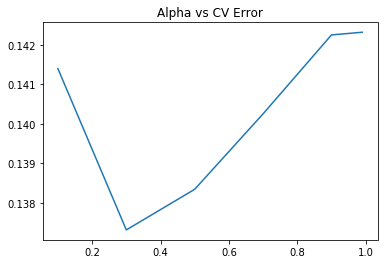

In [114]:
plt.plot(max_features,test_scores)
plt.title("Alpha vs CV Error")
min(test_scores)

# Ensemble
用stacking思维来汲取两种或者多种模型的优点
把最好的参数拿出来，做成最终的model

In [118]:
ridge =Ridge(alpha=15)
rf =RandomForestRegressor(n_estimators=500,max_features=.3)

In [120]:
ridge.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [121]:
y_ridge=np.expm1(ridge.predict(X_test))
y_rf =np.expm1(rf.predict(X_test))

## 平均一波

In [122]:
y_final =(y_ridge+y_rf)/2

In [123]:
y_final

array([ 119359.53903952,  150879.84081023,  174979.23188768, ...,
        155312.05108449,  112888.27714363,  225401.67619831])

## 提交结果

In [124]:
submission_df =pd.DataFrame(data={'Id':test_df.index,'SalePrice':y_final})

In [126]:
submission_df.head()

,Id,SalePrice
0,1461,119359.539040
1,1462,150879.840810
2,1463,174979.231888
3,1464,189962.769248
4,1465,194717.368381
